In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pp
import seaborn as sb

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter
from matplotlib import rcParams

%matplotlib inline

sb.set_style('whitegrid')

address = 'ice cream.csv'
icecream = pd.read_csv(address)
icecream.columns = ['Temperature', 'Sales']
print(icecream.head())
print('\n')
print(icecream.info())

   Temperature  Sales
0         14.2    215
1         16.4    325
2         11.9    185
3         15.2    332
4         18.5    406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  12 non-null     float64
 1   Sales        12 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes
None


In [ ]:
cross_tab  = pd.crosstab

Using pairplot to also check if there is normal distribution in the dataset
Also to validate the associate between the Temperature and Sale


<Figure size 720x432 with 0 Axes>

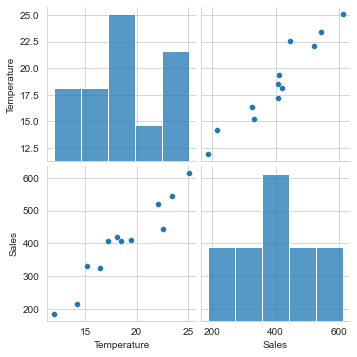

In [2]:
pp.figure(figsize=(10,6))
sb.pairplot(icecream)

<AxesSubplot:>

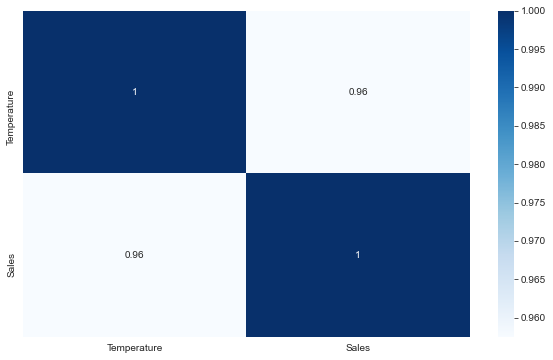

In [3]:
pp.figure(figsize=(10,6))
sb.heatmap(icecream.corr(), annot=True,cmap='Blues' )

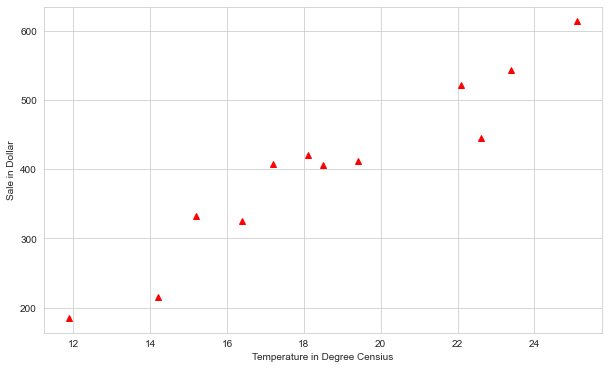

In [4]:
pp.figure(figsize=(10,6))
x = icecream['Temperature']

y = icecream['Sales']

pp.plot(x,y, 'r^')
pp.xlabel('Temperature in Degree Censius')
pp.ylabel('Sale in Dollar')
pp.show()

# The correlation value of the dataset


In [5]:
corr = icecream.corr()
corr

,Temperature,Sales
Temperature,1.000000,0.957507
Sales,0.957507,1.000000


# Setting the independent as Temperature and dependent as SAle

In [6]:
reg = smf.ols('Sales ~ 1 + Temperature', data=icecream).fit()
print(reg.mse_resid)
re = reg.params
print(re)
intercept = re['Intercept']
coefficent = re['Temperature']

1453.6300415766168
Intercept     -159.474152
Temperature     30.087862
dtype: float64


<AxesSubplot:xlabel='Sales'>

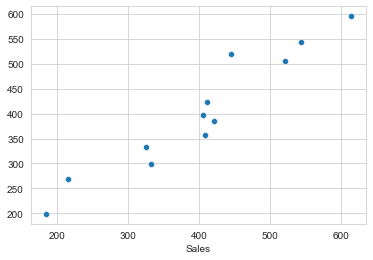

In [7]:
sb.scatterplot(x='Sales', y=reg.predict(), data= icecream)

# The Summary analysis gives the Regression analysis of the dataset

# And for every 1 unit increament in temperature, there will be an increase multiplying effect on the Ice cream sales by 30.088.There is a significant effect of temperature on the ice cream sales, because the goodness of fit (R square) is approximately 92%

# And the significant level is approximately 99%

In [8]:
y =reg.summary()
y

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     110.2
Date:                Wed, 19 May 2021   Prob (F-statistic):           1.02e-06
Time:                        21:00:58   Log-Likelihood:                -59.624
No. Observations:                  12   AIC:                             123.2
Df Residuals:                      10   BIC:                             124.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -159.4742     54.641     -2.919      0.015    -281.221     -37.727
Temperature    30.0879      2.866     10.499      0.000      23.702      36.473
==============================================================================
Omnibus:                        2.061   Durbin-Watson:                   2.512
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                1.031
Skew:                          -0.713   Prob(JB):                        0.597
Kurtosis:                       2.827   Cond. No.                         94.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Using the regression equation, 
# we can predict for each day sales depending on the temperature
# y = a + xb1
where a = the intercept,
b1 = the coefficent of the temperature,
x = the temperature value to input

In [9]:

def prediction():
    x = int(input('Enter the temperature:'))
    y = intercept + ( x * coefficent)
    return y
sales = prediction()
print('The sales for this day should around {} $'.format(sales))

Enter the temperature:60
The sales for this day should around 1645.797555313849 $


In [10]:
sm.stats.anova_lm(reg)

,df,sum_sq,mean_sq,F,PR(>F)
Temperature,1.0,160218.616251,160218.616251,110.219665,0.000001
Residual,10.0,14536.300416,1453.630042,NaN,NaN
